In [17]:
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from math import sin, sqrt, pi

In [36]:
class ParticleInABox2d:
    def __init__(self, mass=1, length=1):
        """
        Parameters
        ----------
        mass: float
            The mass of the particle.
        
        length:
            Legnth of each side of the box in x and y dimensions.
        """
        self.mass = mass
        self.length = length
        
    def wavefunction(self, n, k, x, y):
        """
        Parameters
        ----------
        n: int
            Quantum number in the x dimension
            
        k: int
            Quantum number in the y dimension
            
        x: float
            x position in the box. Range from zero to self.length
            
        y: float
            y position in the box. Range from zero to self.length
            
        Returns
        -------
        float
            The value of the wavefunction n, k at x, y
        """
        return (2 / self.length) * sin(n * pi * x / self.length) * sin(k * pi * y / self.length)
    
    def sq_wavefunction(self, n, k):
        """
        Parameters
        ----------
        n: int
            Quantum number in the x dimension
        
        k: int
            Quantum number in the y dimension
            
        Returns
        -------
        np.array
            Float 2d numpy array of squares of wavefunctions at the various
            points.
        """
        points = 100
        xs = np.linspace(0.0, self.length, points)
        ys = np.linspace(0.0, self.length, points)
        zs = np.zeros((points, points), np.float64)
        for ix, x in enumerate(xs):
            for iy, y in enumerate(ys):
                zs[ix, iy] = self.wavefunction(n, k, x, y) ** 2
        return xs, ys, zs

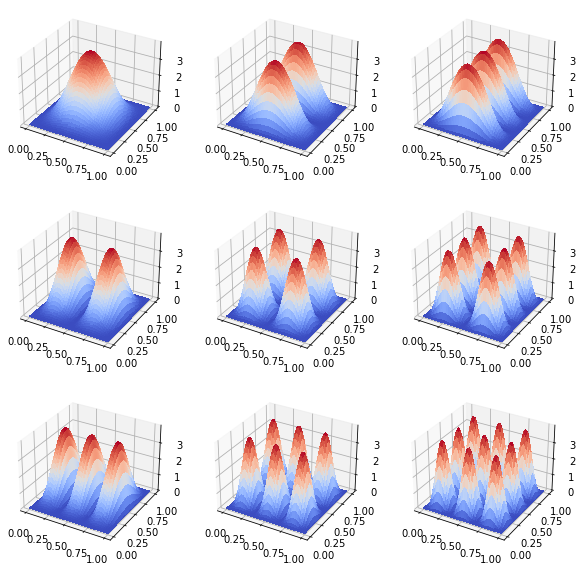

In [56]:
box_2d = ParticleInABox2d(mass=1.0, length=1.0)
ns = [1, 2, 3]
ks = [1, 2, 3]
fig, axs = plt.subplots(nrows=len(ns), ncols=len(ks), figsize=(10, 10), subplot_kw={"projection": "3d"})

for idx_n, n in enumerate(ns):
    for idx_k, k in enumerate(ks):
        xs, ys, zs = box_2d.sq_wavefunction(n, k)
        xs, ys = np.meshgrid(xs, ys)
        axs[idx_n, idx_k].plot_surface(ys, xs, zs, cmap=cm.coolwarm, linewidth=0, antialiased=False)